In [10]:
from mpkfda import MPKFDA
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [11]:
# Simple test to ensure that the classifier is working
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([0, 0, 1, 1])
clf = MPKFDA(k=10)
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))

[1.]


In [12]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Sparsity: 499000.00%
Test score: 0.0000


ValueError: cannot reshape array of size 1 into shape (28,28)

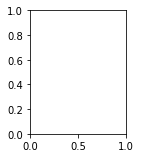

In [13]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
# clf = LogisticRegression(C=50. / train_samples,
#                          multi_class='multinomial',
#                          penalty='l1', solver='saga', tol=0.1)
clf = MPKFDA(k=10, tol=1e-5, set_to_zero=False, verbose=False)
clf.fit(X_train, y_train)
sparsity = float(clf.n_support_) / X_train.shape[0] * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity: %.2f%%" % sparsity)
print("Test score: %.4f" % score)

ValueError: cannot reshape array of size 1 into shape (28,28)

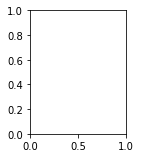

In [14]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()